In [1]:
options(width=75)
library(glue)
library(tidyverse)
library(quanteda)

── Attaching packages ────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ───────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks glue::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()

Package version: 1.5.2

Parallel computing: 2 of 8 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [2]:
library(quanteda)
texts = c("The caged bird sings with a fearful trill", 
          "for the caged bird sings of freedom")
d = dfm(texts)
# Inspect by converting to a (dense) matrix
convert(d, "matrix") 

,the,caged,bird,sings,with,a,fearful,trill,for,of,freedom
text1,1,1,1,1,1,1,1,1,0,0,0
text2,1,1,1,1,0,0,0,0,1,1,1


In [3]:
text = "I haven't seen John's derring-do"
tokens(text)

tokens from 1 document.
text1 :
[1] "I"          "haven't"    "seen"       "John's"     "derring-do"


In [4]:
haiku = "\u53e4\u6c60\u86d9\u98db\u3073\u8fbc\u3080\u6c34\u306e\u97f3"
tokens(haiku)

tokens from 1 document.
text1 :
[1] "古池"     "蛙"       "飛び込む" "水"       "の"       "音"      


In [5]:
library(tidyverse)
sotu = read_csv("http://cssbook.net/d/sotu.csv") %>% 
       mutate(doc_id = paste(lubridate::year(Date), President, delivery))
d = corpus(sotu) %>% dfm()
d

Parsed with column specification:
cols(
  FirstName = col_character(),
  President = col_character(),
  Date = col_date(format = ""),
  delivery = col_character(),
  type = col_character(),
  party = col_character(),
  text = col_character()
)



Document-feature matrix of: 85 documents, 17,999 features (91.0% sparse).

In [6]:
textstat_frequency(d)[c(1, 10, 100, 1000, 15000)]

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
1,the,35020,1,85,all
10,our,9336,10,85,all
100,first,752,100,83,all
1000,investments,76,988,34,all
15000,defrauded,1,10972,1,all


In [7]:
as.matrix(d[c(3, 25, 50, 75), c("the", "our", "first", "investments", "defrauded")])

,the,our,first,investments,defrauded
1946 Truman written,2142,186,21,2,0
1965 Johnson spoken,283,81,14,0,0
1984 Reagan spoken,209,92,8,0,0
2009 Obama spoken,269,116,8,1,0


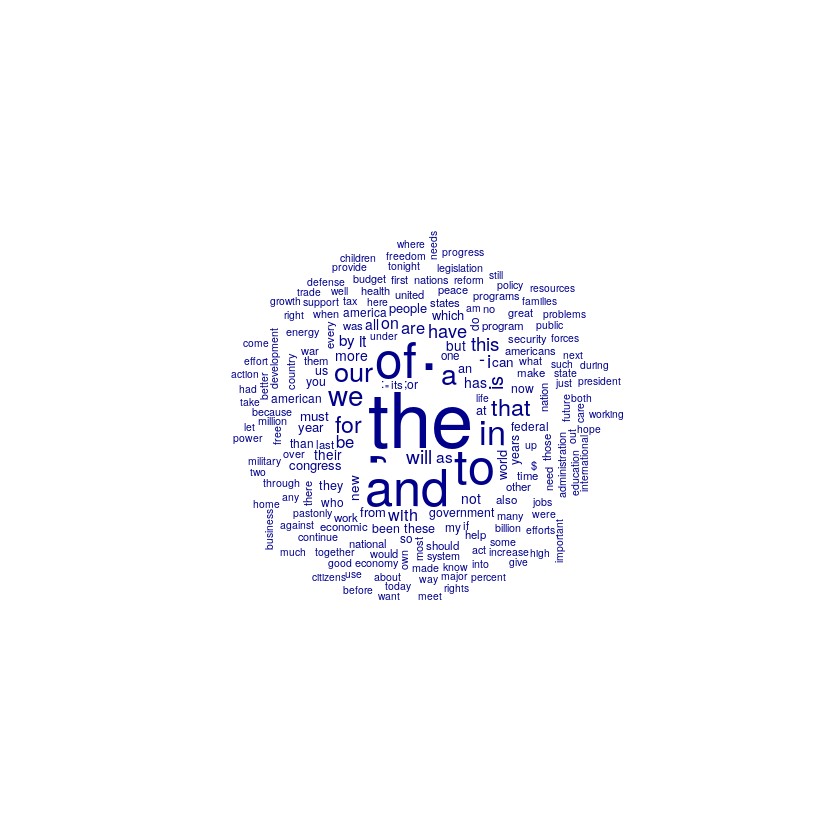

In [8]:
textplot_wordcloud(d, max_words=200)

In [9]:
url = "http://cssbook.net/d/trumptweets.csv"
tweets = read_csv(url, col_types=cols_only(text='c', status_id='c')) 
head(tweets)

status_id,text
<chr>,<chr>
x1864367186,Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6
x9273573134835712,"Congratulations to Evan Lysacek for being nominated SI sportsman of the year. He's a great guy, and he has my vote! #EvanForSI"
x29014512646,"I was on The View this morning. We talked about The Apprentice. Tonight's episode is a great one--tough, exciting and surprising. 10 pm/NBC"
x7483813542232064,Tomorrow night's episode of The Apprentice delivers excitement at QVC along with appearances by Isaac Mizrahi and Cathie Black. 10 pm on NBC
x5775731054,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc"
x14785576859340800,"I'll be appearing on Larry King Live for his final show, Thursday night at 9 p.m., CNN. Larry's been on TV for 25 years..."


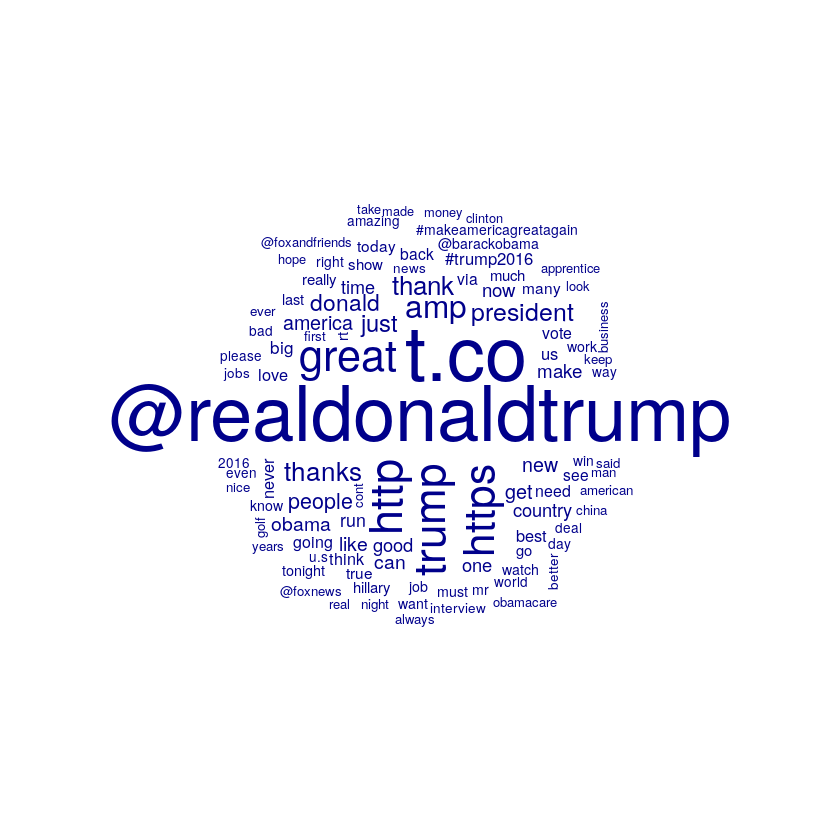

In [10]:
d = corpus(tweets) %>% dfm(remove=stopwords('english'), remove_punct=T)
textplot_wordcloud(d, max_words=100)



In [11]:
mystopwords = stopwords('english', source="snowball")
mystopwords = c( "go", "one", mystopwords)
glue("Now {length(mystopwords)} stopwords: {paste(mystopwords[1:5], collapse=', ')}...")



Now 177 stopwords: go, one, i, me, my...

In [12]:
d_trim = dfm_trim(d, min_docfreq = 0.005, max_docfreq = 0.75, docfreq_type = "prop")
glue("# of unique words before trimming: {ncol(d)}; after trimming: {ncol(d_trim)}")


# of unique words before trimming: 44303; after trimming: 301

In [13]:
d_tf = corpus(sotu) %>% dfm() %>% dfm_tfidf(scheme_tf="prop", smoothing=1)
as.matrix(d_tf [c(3, 25, 50, 75), c("the", "our", "first", "investments", "defrauded")])

,the,our,first,investments,defrauded
1946 Truman written,0.02076537,0.001803155,0.0002070995,3.504238e-05,0
1965 Johnson spoken,0.01732238,0.004957997,0.0008717439,0.000000e+00,0
1984 Reagan spoken,0.01131977,0.004982864,0.0004407790,0.000000e+00,0
2009 Obama spoken,0.01208793,0.005212641,0.0003657038,8.121631e-05,0


In [14]:
single_tweet = tweets$text[tweets$status_id == "x263687274812813312"]
print(glue("Raw:\n{single_tweet}"))
tweet_tokens = tokens(single_tweet)
print(glue("After tokenizing:\n{paste(tweet_tokens, collapse=' | ')}"))

Raw:
Part 1 of my @jimmyfallon interview discussing my $5M offer to Obama, #TRUMP Tower atrium, my tweets &amp; 57th st. crane http://t.co/AvLO9Inf
After tokenizing:
Part | 1 | of | my | @jimmyfallon | interview | discussing | my | $ | 5M | offer | to | Obama | , | #TRUMP | Tower | atrium | , | my | tweets | & | amp | ; | 57th | st | . | crane | http | : | / | / | t.co | / | AvLO9Inf


In [15]:
single_tweet = single_tweet  %>% str_remove_all("\\bhttps?://\\S*|&\\w+;")
tweet_tokens = tokens(single_tweet)
print(glue("After pre-processing:\n{paste(tweet_tokens, collapse=' | ')}"))

After pre-processing:
Part | 1 | of | my | @jimmyfallon | interview | discussing | my | $ | 5M | offer | to | Obama | , | #TRUMP | Tower | atrium | , | my | tweets | 57th | st | . | crane


In [16]:
tweet_tokens = tweet_tokens  %>% tokens_tolower()  %>% 
  tokens_remove(stopwords('english')) %>% 
  tokens_keep("^\\p{LETTER}", valuetype='regex')
print(glue("After pruning tokens:\n{paste(tweet_tokens, collapse=' | ')}"))

After pruning tokens:
part | interview | discussing | offer | obama | tower | atrium | tweets | st | crane


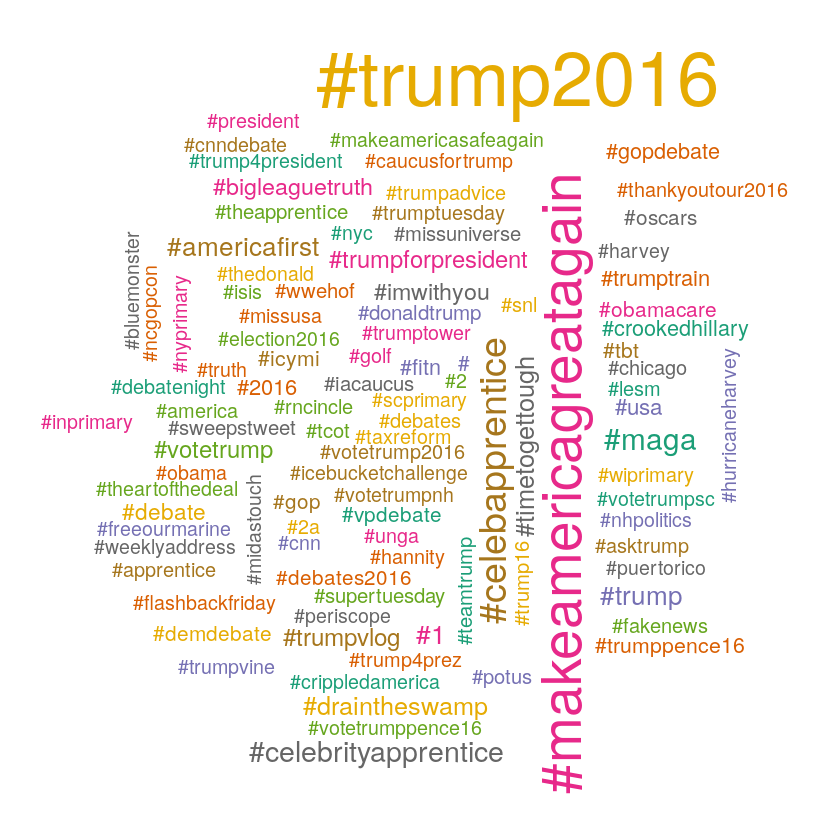

In [17]:
dfm_cleaned = tweets %>% 
  corpus() %>% 
  tokens()  %>% 
  tokens_keep("^#", valuetype='regex')  %>% 
  dfm()
colors = RColorBrewer::brewer.pal(8, "Dark2")
textplot_wordcloud(dfm_cleaned, max_words=100, min_size = 1, max_size=4, 
                   random_order = TRUE, random_color= TRUE, color=colors)

In [18]:


glove_fn = 'glove.6B.50d.10k.w2v.txt'
url = glue('http://cssbook.net/d/{glove_fn}')
if (!file.exists(glove_fn)) 
    download.file(url, glove_fn)

In [19]:
wv_tibble = read_delim(glove_fn, skip=1, delim=" ", quote="", 
    col_names = c("word", paste0("d", 1:50)))
wv = as.matrix(wv_tibble[-1])
rownames(wv) = wv_tibble$word
wv = wv / sqrt(rowSums(wv^2))
wv[order(wv[,1])[1:5], 1:5]

Parsed with column specification:
cols(
  .default = col_double(),
  word = col_character()
)

See spec(...) for full column specifications.



,d1,d2,d3,d4,d5
20003,-0.4402265,0.07209431,-0.02397687,0.18428984,0.001802660
basketball,-0.4234652,0.23817458,-0.09346347,0.17270343,-0.001520135
collegiate,-0.4232457,0.23873925,-0.28741579,0.02797958,-0.066008001
volleyball,-0.4217268,0.18378662,-0.26229465,0.31409226,-0.124286069
ncaa,-0.4131240,0.14502199,-0.06088206,0.17017979,-0.157397324


In [20]:
wvector = function(wv, word) wv[rownames(wv) == word,,drop=F]
wv_similar = function(wv, target, n=5) {
  similarities = wv %*% t(target)
  similarities %>% as_tibble(rownames = "word") %>% 
    rename(similarity=2) %>% 
    arrange(-similarity) %>% 
    head(n=n)  
}
wv_similar(wv, wvector(wv, "fraud"))

word,similarity
<chr>,<dbl>
fraud,1.0000000
charges,0.8591152
bribery,0.8559850
alleged,0.8415063
corruption,0.8299386


In [21]:
wv_analogy = function(wv, a, b, c) {
  result = wvector(wv, b) + wvector(wv, c) - wvector(wv, a)
  matches = wv_similar(wv, result) %>% 
    filter(!word %in% c(a,b,c))
  matches$word[1]
}
for (x in c("king", "boy", "father", "pete", "football")) {
    y = wv_analogy(wv, 'man', x, 'woman')
    print(glue("Man is to {x} as woman is to: {y}"))
}

Man is to king as woman is to: queen
Man is to boy as woman is to: girl
Man is to father as woman is to: mother
Man is to pete as woman is to: barbara
Man is to football as woman is to: soccer


In [28]:
text = "This is a test"
tokens(text)  %>% tokens_tolower() %>% tokens_ngrams(1:3)

tokens from 1 document.
text1 :
[1] "this"      "is"        "a"         "test"      "this_is"   "is_a"     
[7] "a_test"    "this_is_a" "is_a_test"


In [30]:
sotu_tokens = corpus(sotu)  %>%  tokens(remove_punct=T)  %>%  
  tokens_remove(stopwords('english')) %>% tokens_tolower()
dfm_bigram = sotu_tokens %>% tokens_ngrams(1:2) %>% dfm()
textstat_frequency(dfm_bigram)  %>% filter(str_detect(feature, "government"))  %>% head(12)

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
10,government,1424,10,84,all
197,federal_government,265,197,56,all
317,governments,188,317,50,all
652,local_governments,104,648,28,all
972,government's,71,971,25,all
1211,government_must,55,1195,28,all
1453,government_can,44,1432,26,all
1543,governmental,41,1536,19,all
1945,local_government,32,1916,16,all


In [24]:
sotu_tokens = corpus(sotu)  %>% 
  tokens(remove_punct=T) %>% 
  tokens_tolower()

colloc = sotu_tokens %>% 
  textstat_collocations(min_count=10) %>% 
  as_tibble() 


colloc %>% arrange(-lambda)  %>% head()

collocation,count,count_nested,length,lambda,z
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
saddam hussein,26,0,2,15.24138,10.343970
iron curtain,11,0,2,15.16875,9.847614
al qaida,37,0,2,14.58301,10.122581
red tape,22,0,2,13.46831,15.142370
persian gulf,31,0,2,12.90189,18.510734
line-item veto,10,0,2,12.84926,8.812426


In [25]:
collocations = colloc  %>% 
  filter(lambda > 8)  %>%  
  pull(collocation)  %>%  
  phrase()
dfm = sotu_tokens %>% 
  tokens_compound(collocations) %>% 
  dfm()
textstat_frequency(dfm) %>% 
  filter(str_detect(feature, "hussein"))

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
2186,saddam_hussein,26,2119,5,all
8516,hussein's,3,7332,2,all


In [26]:
library(udpipe)
udpipe("John bought new knives", "english") %>% select(token_id:upos, head_token_id:dep_rel)

token_id,token,lemma,upos,head_token_id,dep_rel
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,John,John,PROPN,2,nsubj
2,bought,buy,VERB,0,root
3,new,new,ADJ,4,amod
4,knives,knife,NOUN,2,obj


`summarise()` ungrouping output (override with `.groups` argument)



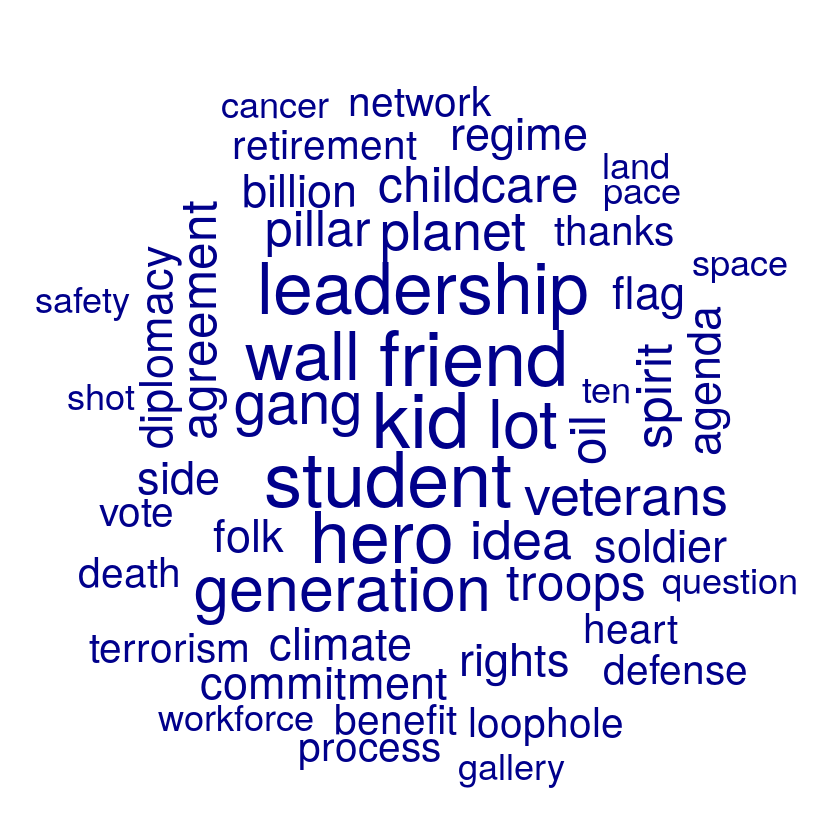

In [27]:
tokens = sotu %>% top_n(5, Date) %>%  udpipe("english", parser='none')
nouns = tokens  %>% filter(upos == "NOUN") %>% 
  group_by(doc_id)  %>% summarize(text=paste(lemma, collapse=" "))
nouns %>% corpus() %>% dfm() %>% 
  dfm_trim(max_docfreq=0.7, docfreq_type='prop')  %>% 
  textplot_wordcloud(max_words=50)